Solving linear variational problem.


Text(0.5, 1.0, '$\\Omega$')

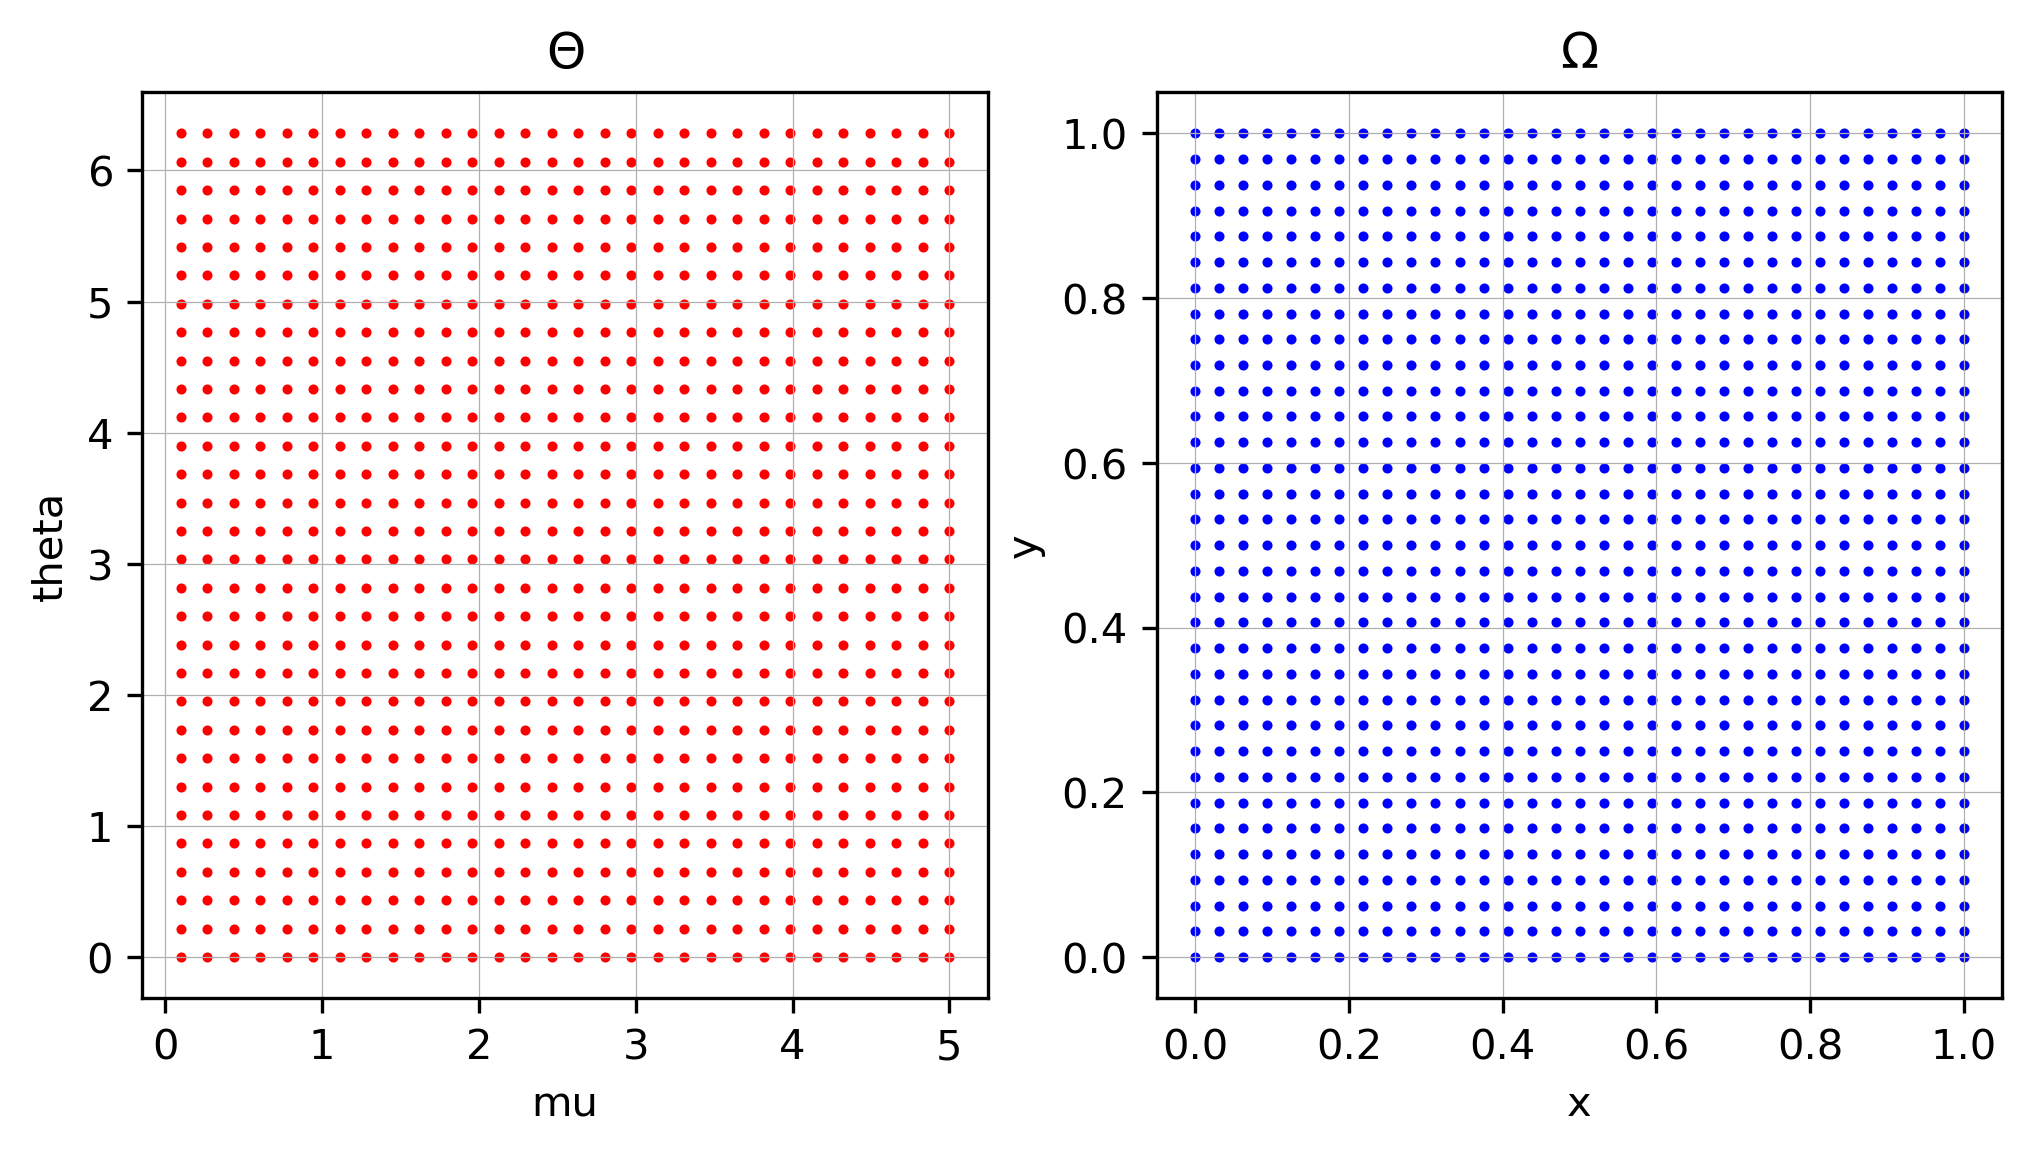

In [18]:
# %% Import relevant libraries

from fenics import *

import numpy             as np
import matplotlib.pyplot as plt



# %% Settings

n_mu    = 30        # number of values of mu    in the range [0.1, 5]
n_theta = 30        # number of values of theta in the range [0  , 2*pi]

mus    = np.linspace(0.1, 5,       n_mu)        # diffusion parameter
thetas = np.linspace(0,   2*np.pi, n_theta)     # advection angle parameter

n_segments_h = 32         # number of segments on the horizontal axis
n_segments_v = 32         # number of segments on the vertical   axis

x_0 = np.array([0.5,0.5]) # center of the bump source-force


# %% Generate Theta plot

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), dpi = 300)

mu_grid, theta_grid = np.meshgrid(mus, thetas)

ax[0].grid(linewidth=0.3)
ax[0].scatter(mu_grid, theta_grid, color = 'red', s = 2)
ax[0].set_xlabel('mu')
ax[0].set_ylabel('theta')
ax[0].set_title(r'$\Theta$')



# %% Extract the mesh grid

# Create mesh and define function space
mesh = UnitSquareMesh(n_segments_h, n_segments_v)
V    = FunctionSpace(mesh, 'P', 2)

# Define boundary condition
u_D = Constant(0)         # Homogeneous (null) boundary conditions

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# force function
f = Expression('10*exp(-50*pow( pow(x[0]-x_00, 2) + pow(x[1]-x_01, 2), 0.5))', 
               degree=2, x_00 = x_0[0], x_01 = x_0[1])

# Define variational problem
u = TrialFunction(V)
v = TestFunction (V)

# current values of mu and theta
curr_mu = mus[0]
curr_theta = thetas[0]

# define the variational problem
b = Constant((np.cos(curr_theta), np.sin(curr_theta)))
a = curr_mu * dot(grad(u), grad(v)) * dx + 10 * dot(b,grad(u)) * v * dx
L = f*v*dx

# Compute solution of variational problem
u = Function(V)
solve(a == L, u, bc)

mesh_coords = mesh.coordinates()



# %% Generate the Omega plot

ax[1].grid(linewidth=0.3)
ax[1].scatter(mesh_coords[:,0], mesh_coords[:,1], color = 'blue', s = 2)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(r'$\Omega$')